In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [3]:
import numpy as np

# Trees

In [4]:
import pandas as pd

In [5]:
data = pd.read_excel('data/CCPP/Folds5x2_pp.xlsx')

In [6]:
smoothed = data.groupby('V', as_index=False).mean()
smoothed = smoothed[smoothed.V > 30]

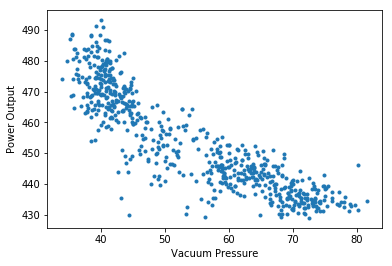

In [17]:
plt.plot(smoothed.V, smoothed.PE, '.')
plt.xlabel('Vacuum Pressure')
plt.ylabel('Power Output')

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [18]:
smoothed['Vsq'] = smoothed.V**2

In [19]:
lreg = LinearRegression().fit(smoothed[['V', 'Vsq']], smoothed.PE)

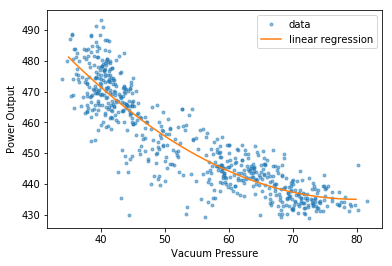

In [46]:
plt.plot(smoothed.V, smoothed.PE, '.', label='data', alpha=0.5)
xs = np.arange(35,80,.1)
plt.plot(xs, lreg.predict([(x, x**2) for x in xs]), label='linear regression')
#plt.plot(xs, tree.predict(xs.reshape(-1,1)), label='decision tree')
plt.xlabel('Vacuum Pressure')
plt.ylabel('Power Output')
plt.legend()
plt.savefig('../../Sparebank/talks/img/lr.png', dpi=300)

In [25]:
tree = DecisionTreeRegressor(max_depth=2).fit(smoothed[['V']], smoothed.PE)

In [47]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [46]:
dot = export_graphviz(tree, out_file=None, feature_names=['V'], rounded=True, filled=True, class_names=['PE'])

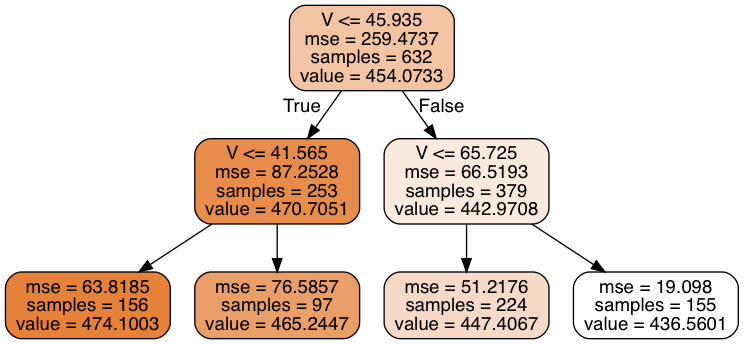

In [51]:
graph = pydotplus.graph_from_dot_data(dot)
Image(graph.create_png())

In [53]:
graph.write_png('../../Sparebank/talks/img/reg_tree.png')

True

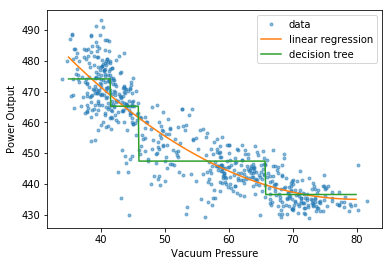

In [45]:
plt.plot(smoothed.V, smoothed.PE, '.', label='data', alpha=0.5)
xs = np.arange(35,80,.1)
plt.plot(xs, lreg.predict([(x, x**2) for x in xs]), label='linear regression')
plt.plot(xs, tree.predict(xs.reshape(-1,1)), label='decision tree')
plt.xlabel('Vacuum Pressure')
plt.ylabel('Power Output')
plt.legend()
plt.savefig('../../Sparebank/talks/img/lr_vs_tree.png', dpi=300)

In [111]:
deep_tree = DecisionTreeRegressor(max_depth=5).fit(smoothed[['V']], smoothed.PE)

In [112]:
shallow_tree = DecisionTreeRegressor(max_depth=1).fit(smoothed[['V']], smoothed.PE)

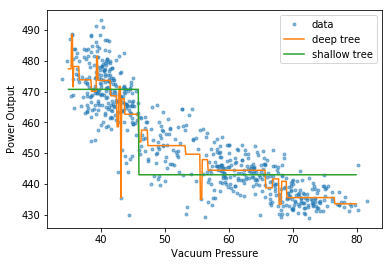

In [114]:
plt.plot(smoothed.V, smoothed.PE, '.', label='data', alpha=0.5)
xs = np.arange(35,80,.1)
plt.plot(xs, deep_tree.predict(xs.reshape(-1,1)), label='deep tree')
plt.plot(xs, shallow_tree.predict(xs.reshape(-1,1)), label='shallow tree')
plt.xlabel('Vacuum Pressure')
plt.ylabel('Power Output')
plt.legend()
plt.savefig('../../Sparebank/talks/img/tree_depth.png', dpi=300)

In [119]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(smoothed, test_size=0.2)
MSE_train, MSE_test = [], []
ds = range(1, 11)
for d in ds:
    model_d = DecisionTreeRegressor(max_depth=d).fit(train[['V']], train.PE)
    MSE_train.append(np.mean((model_d.predict(train[['V']]) - train.PE)**2))
    MSE_test.append(np.mean((model_d.predict(test[['V']]) - test.PE)**2))

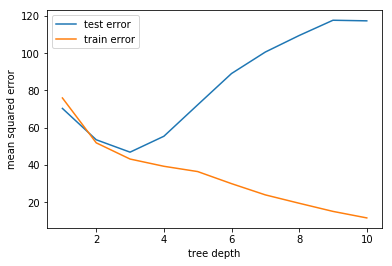

In [124]:
plt.plot(ds, MSE_test, label='test error')
plt.plot(ds, MSE_train, label='train error')
plt.legend()
plt.xlabel('tree depth')
plt.ylabel('mean squared error')
plt.savefig('../../Sparebank/talks/img/tree_depth_train_test.png', dpi=300)

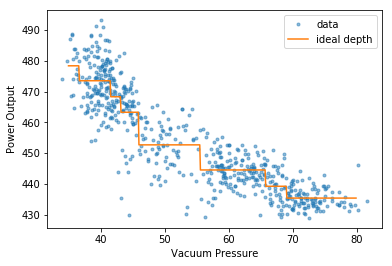

In [125]:
plt.plot(smoothed.V, smoothed.PE, '.', label='data', alpha=0.5)
xs = np.arange(35,80,.1)
plt.plot(xs, DecisionTreeRegressor(max_depth=3).fit(smoothed[['V']], smoothed.PE).predict(xs.reshape(-1,1)), label='ideal depth')
plt.xlabel('Vacuum Pressure')
plt.ylabel('Power Output')
plt.legend()

In [54]:
red_wine = pd.read_csv('data/winequality-red.csv', sep=';')

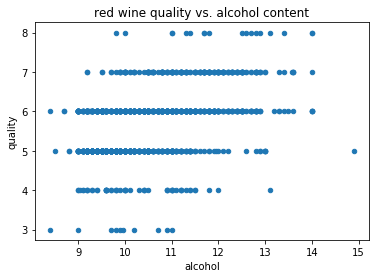

In [14]:
red_wine.plot.scatter('alcohol', 'quality')
plt.title('red wine quality vs. alcohol content')

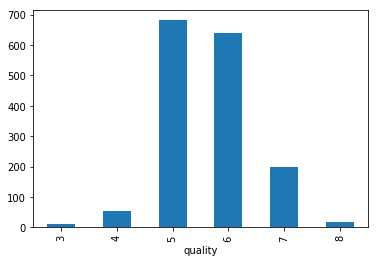

In [213]:
red_wine.groupby('quality').quality.count().plot.bar()
plt.savefig('../../Sparebank/talks/img/winequals_bar.png')

In [48]:
red_wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [56]:
wine_tree = DecisionTreeRegressor(max_depth=3).fit(red_wine[['alcohol','sulphates']], red_wine.quality)
xx, yy = np.meshgrid(np.arange(8,15,.05), np.arange(0.4,2,0.01))
X, Y = xx.ravel(), yy.ravel()
Z = wine_tree.predict(np.c_[X,Y]).reshape(xx.shape)

In [100]:
from pylab import get_cmap

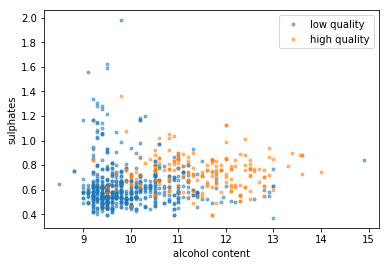

In [110]:
for qual, data in red_wine.groupby('quality'):
    if qual in [5,7]:
        plt.plot(data.alcohol, data.sulphates, '.', alpha=0.5, label={5: 'low quality',
                                                                      6: 'medium quality',
                                                                      7: 'high quality'}[qual])
#plt.contourf(xx, yy, Z, cmap=get_cmap('BuGn'), alpha=0.6)
plt.xlabel('alcohol content')
plt.ylabel('sulphates')
plt.legend()
plt.savefig('../../Sparebank/talks/img/winequal.png', dpi=300)

In [57]:
wine_dot = export_graphviz(wine_tree, out_file=None, rounded=True, filled=True, feature_names=['alcohol', 'sulphates'])

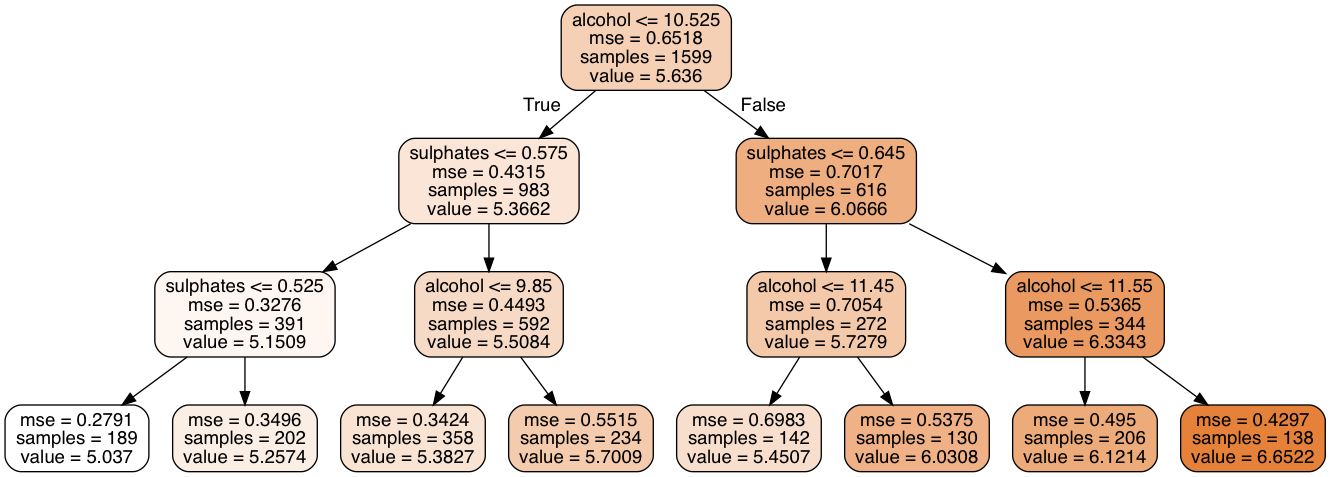

In [59]:
wine_graph = pydotplus.graph_from_dot_data(wine_dot)
Image(wine_graph.create_png())

In [62]:
wine_vars = list(red_wine.columns)

In [63]:
wine_vars.remove('quality')

In [129]:
from sklearn.tree import DecisionTreeClassifier

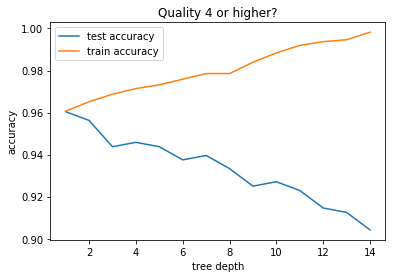

In [224]:
Xtr, Xte, ytr, yte = train_test_split(red_wine[wine_vars], red_wine.quality > 4, test_size=0.3)
hr_train, hr_test = [], []
ds = range(1, 15)
for d in ds:
    model_d = DecisionTreeClassifier(max_depth=d).fit(Xtr, ytr)
    hr_train.append(np.mean(model_d.predict(Xtr) == ytr))
    hr_test.append(np.mean(model_d.predict(Xte) == yte))
plt.plot(ds, hr_test, label='test accuracy')
plt.plot(ds, hr_train, label='train accuracy')
plt.legend()
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.title('Quality 4 or higher?')
plt.savefig('../../Sparebank/talks/img/tree_depth_train_test_wine_bad.png', dpi=300)

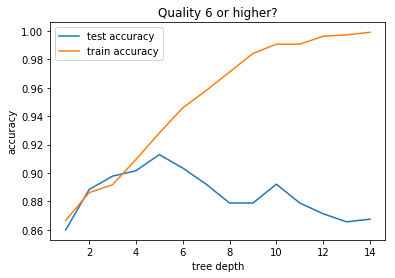

In [228]:
Xtr, Xte, ytr, yte = train_test_split(red_wine[wine_vars], red_wine.quality > 6, test_size=0.33)
hr_train, hr_test = [], []
ds = range(1, 15)
for d in ds:
    model_d = DecisionTreeClassifier(max_depth=d).fit(Xtr, ytr)
    hr_train.append(np.mean(model_d.predict(Xtr) == ytr))
    hr_test.append(np.mean(model_d.predict(Xte) == yte))
plt.plot(ds, hr_test, label='test accuracy')
plt.plot(ds, hr_train, label='train accuracy')
plt.legend()
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.title('Quality 6 or higher?')
plt.savefig('../../Sparebank/talks/img/tree_depth_train_test_wine_great.png', dpi=300)

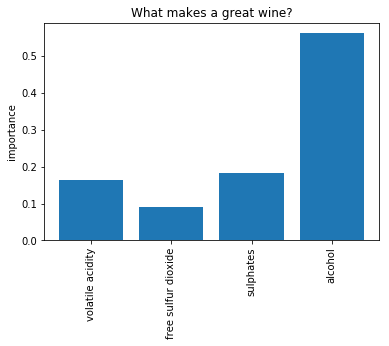

In [229]:
dt = DecisionTreeClassifier(max_depth=3).fit(Xtr, ytr)
relevant = dt.feature_importances_ > 0
labels = np.array(wine_vars)[relevant]
plt.bar(range(len(labels)), dt.feature_importances_[relevant])
plt.xticks(range(len(labels)), labels, rotation='vertical')
plt.ylabel('importance')
plt.title('What makes a great wine?')
plt.savefig('../../Sparebank/talks/img/wine_importance.png', dpi=300, bbox_inches='tight')

In [216]:
wine_vars, dt.feature_importances_

(['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol'],
 array([ 0.        ,  0.11237654,  0.        ,  0.        ,  0.        ,
         0.04160929,  0.05645671,  0.        ,  0.        ,  0.18890718,
         0.60065028]))

In [162]:
dtm = DecisionTreeClassifier(max_depth=2).fit(Xtr, ytr)

In [163]:
for qual in sorted(yte.unique()):
    hr = np.mean(dtm.predict(Xte[yte == qual]) == yte[yte==qual])
    perc = sum(yte==qual) / float(len(yte))
    print qual, " ".join("{:4.2f}".format(i) for i in (hr, perc))

3 0.00 0.01
4 0.00 0.04
5 0.74 0.45
6 0.58 0.38
7 0.00 0.12
8 0.00 0.00


In [167]:
dtm = DecisionTreeClassifier(max_depth=6).fit(Xtr, ytr)
for qual in sorted(yte.unique()):
    hr = np.mean(dtm.predict(Xte[yte == qual]) == yte[yte==qual])
    perc = sum(yte==qual) / float(len(yte))
    print qual, " ".join("{:4.2f}".format(i) for i in (hr, perc))

3 0.25 0.01
4 0.00 0.04
5 0.59 0.45
6 0.64 0.38
7 0.52 0.12
8 0.00 0.00


In [169]:
from sklearn.ensemble import RandomForestClassifier

In [170]:
rf = RandomForestClassifier().fit(Xtr, ytr > 5)

In [173]:
from sklearn.metrics import roc_curve

In [180]:
fpr, tpr, thresholds = roc_curve(yte > 5, rf.predict_proba(Xte)[:,1], drop_intermediate=False)

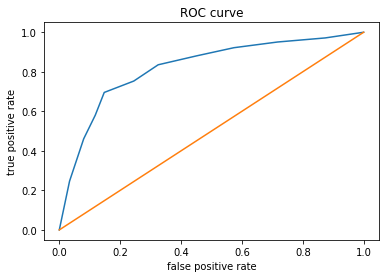

In [184]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.savefig('../../Sparebank/talks/img/ROC.png', dpi=300)